In [73]:
import numpy as np
import pandas as pd
import random as rnd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# **Reading & Describing Data**

In [2]:
df=pd.read_csv('Train.csv')
sub_df=pd.read_csv('Test.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [4]:
#train=df.sample(frac=0.7,random_state=200)
#test=df.drop(train.index)

In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [8]:
#Mapping Fat Content to int
#fat_map={'Low Fat':1, 'Regular':0, 'low fat':1, 'LF':1, 'reg':0}
#df['Item_Fat_Content']=df['Item_Fat_Content'].replace(fat_map)

In [9]:
df['Outlet_Identifier'].unique()

#Ten unique outlets

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

# **Analyse by pivoting features**

In [10]:
df[["Item_Fat_Content", "Item_Outlet_Sales"]].groupby(['Item_Fat_Content'], as_index=False).mean().sort_values(by='Item_Outlet_Sales', ascending=False)

,Item_Fat_Content,Item_Outlet_Sales
2,Regular,2235.186702
1,Low Fat,2164.477336
3,low fat,2087.740737
0,LF,2073.551928
4,reg,1962.192268


In [11]:
df[["Item_Type", "Item_Outlet_Sales"]].groupby(['Item_Type'], as_index=False).mean().sort_values(by='Item_Outlet_Sales', ascending=False)

#maybe dropped..seems evenly distributed.

,Item_Type,Item_Outlet_Sales
15,Starchy Foods,2374.332773
12,Seafood,2326.065928
6,Fruits and Vegetables,2289.009592
13,Snack Foods,2277.321739
9,Household,2258.784300
4,Dairy,2232.542597
3,Canned,2225.194904
1,Breads,2204.132226
10,Meat,2158.977911
7,Hard Drinks,2139.221622


In [12]:
df[["Outlet_Identifier", "Item_Outlet_Sales"]].groupby(['Outlet_Identifier'], as_index=False).mean().sort_values(by='Item_Outlet_Sales', ascending=False)

,Outlet_Identifier,Item_Outlet_Sales
5,OUT027,3694.038558
6,OUT035,2438.841866
9,OUT049,2348.354635
2,OUT017,2340.675263
1,OUT013,2298.995256
8,OUT046,2277.844267
7,OUT045,2192.384798
3,OUT018,1995.498739
4,OUT019,340.329723
0,OUT010,339.351662


In [13]:
df[["Outlet_Establishment_Year", "Item_Outlet_Sales"]].groupby(['Outlet_Establishment_Year'], as_index=False).mean().sort_values(by='Item_Outlet_Sales', ascending=False)

,Outlet_Establishment_Year,Item_Outlet_Sales
0,1985,2483.677474
6,2004,2438.841866
4,1999,2348.354635
7,2007,2340.675263
1,1987,2298.995256
2,1997,2277.844267
5,2002,2192.384798
8,2009,1995.498739
3,1998,339.351662


In [21]:
df[["Outlet_Size", "Item_Outlet_Sales"]].groupby(['Outlet_Size'], as_index=False).mean().sort_values(by='Item_Outlet_Sales', ascending=False)

,Outlet_Size,Item_Outlet_Sales
1,Medium,2681.603542
0,High,2298.995256
2,Small,1912.149161


AS we know that there are plenty NULL values. we will fill them according to the Outlet Sales(maybe MRP ,need to check that)

In [15]:
df[["Outlet_Location_Type", "Item_Outlet_Sales"]].groupby(['Outlet_Location_Type'], as_index=False).mean().sort_values(by='Item_Outlet_Sales', ascending=False)

,Outlet_Location_Type,Item_Outlet_Sales
1,Tier 2,2323.990559
2,Tier 3,2279.627651
0,Tier 1,1876.909159


Feature should be included

In [16]:
df[["Outlet_Type", "Item_Outlet_Sales"]].groupby(['Outlet_Type'], as_index=False).mean().sort_values(by='Item_Outlet_Sales', ascending=False)

,Outlet_Type,Item_Outlet_Sales
3,Supermarket Type3,3694.038558
1,Supermarket Type1,2316.181148
2,Supermarket Type2,1995.498739
0,Grocery Store,339.828500


Important feature to be included.<br>
Supermarket type are way ahead grocery type.<br>
3>1>2>G

# **Data Visualisation**

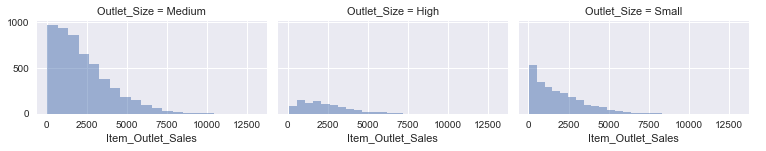

In [26]:
grid = sns.FacetGrid(df, col='Outlet_Size',  size=2.2, aspect=1.6)
grid.map(plt.hist, 'Item_Outlet_Sales', alpha=.5, bins=20)
grid.add_legend();

# **Pre Processing Data**

In [18]:
#filling item weight with mean value

df['Item_Weight']=df['Item_Weight'].fillna(12.85)

In [25]:
#filling outlet size with 'Medium'

df['Outlet_Size']=df['Outlet_Size'].fillna('Medium')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [28]:
#Mapping Fat Content to int
fat_map={'Low Fat':4, 'Regular':5, 'low fat':3, 'LF':2, 'reg':1}
df['Item_Fat_Content']=df['Item_Fat_Content'].replace(fat_map)

In [32]:
outlets_map={'OUT049':8, 'OUT018':3, 'OUT010':1, 'OUT013':6, 'OUT027':10, 'OUT045':4,'OUT017':7, 'OUT046':5, 'OUT035':9, 'OUT019':2}
df['Outlet_Identifier']=df['Outlet_Identifier'].replace(outlets_map)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,4,0.016047,Dairy,249.8092,8,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,5,0.019278,Soft Drinks,48.2692,3,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,4,0.016760,Meat,141.6180,8,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,5,0.000000,Fruits and Vegetables,182.0950,1,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,4,0.000000,Household,53.8614,6,1987,High,Tier 3,Supermarket Type1,994.7052


In [39]:
outlet_size_map={'Small':1,'Medium':2,'High':3}
df['Outlet_Size']=df['Outlet_Size'].replace(outlet_size_map)

In [40]:
df=df[[ 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_MRP', 'Outlet_Identifier',
        'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']]
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,4,0.016047,249.8092,8,2,Tier 1,Supermarket Type1,3735.1380
1,5.92,5,0.019278,48.2692,3,2,Tier 3,Supermarket Type2,443.4228
2,17.50,4,0.016760,141.6180,8,2,Tier 1,Supermarket Type1,2097.2700
3,19.20,5,0.000000,182.0950,1,2,Tier 3,Grocery Store,732.3800
4,8.93,4,0.000000,53.8614,6,3,Tier 3,Supermarket Type1,994.7052


In [41]:
outlet_loctype_map={'Tier 1':1,'Tier 2':2,'Tier 3':3}
df['Outlet_Location_Type']=df['Outlet_Location_Type'].replace(outlet_loctype_map)

In [42]:
outlet_type_map={'Grocery Store':4,'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3}
df['Outlet_Type']=df['Outlet_Type'].replace(outlet_type_map)

In [60]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# **Model Training**

In [61]:
train=df.sample(frac=0.7,random_state=200)
test=df.drop(train.index)

train=train.reset_index()
train=train[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']]
test=test.reset_index()
test=test[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']]


In [65]:
X_train = train[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]
Y_train = train["Item_Outlet_Sales"]
X_test  = test[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]
Y_test=test["Item_Outlet_Sales"]


In [77]:
#linear regression

regr =LinearRegression()
regr.fit(X_train,Y_train)
# Make predictions using the testing set
Y_pred = regr.predict(X_test)
regr.score(X_test,Y_test)

0.5145174397599015